In [1]:
%matplotlib inline
import numpy as np
import os
import pickle 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [2]:
# Expected shape is 1175 Trials x 13 channels x 5000 samples (@ 5000Hz) - value is potential
raw_source_dir = "custom_preprocess/"

files = ['x_new', 'y_new', 'median_new'] # Also consider y.pickle (unlabeled)
file_data = []
for i, fn in enumerate(files):
    with open(os.path.join(raw_source_dir, '{}.pickle'.format(fn)), 'rb') as f:
        file_data.append(np.array(pickle.load(f)))
        
x = file_data[0]
y = file_data[1]
y_med = file_data[2]
print(x.shape)
print(y.shape)
print(y_med.shape)

(1459, 13, 5010)
(1459,)
(1459,)


In [28]:
x_flat = x[:,:,10::10].reshape((x.shape[0], -1))

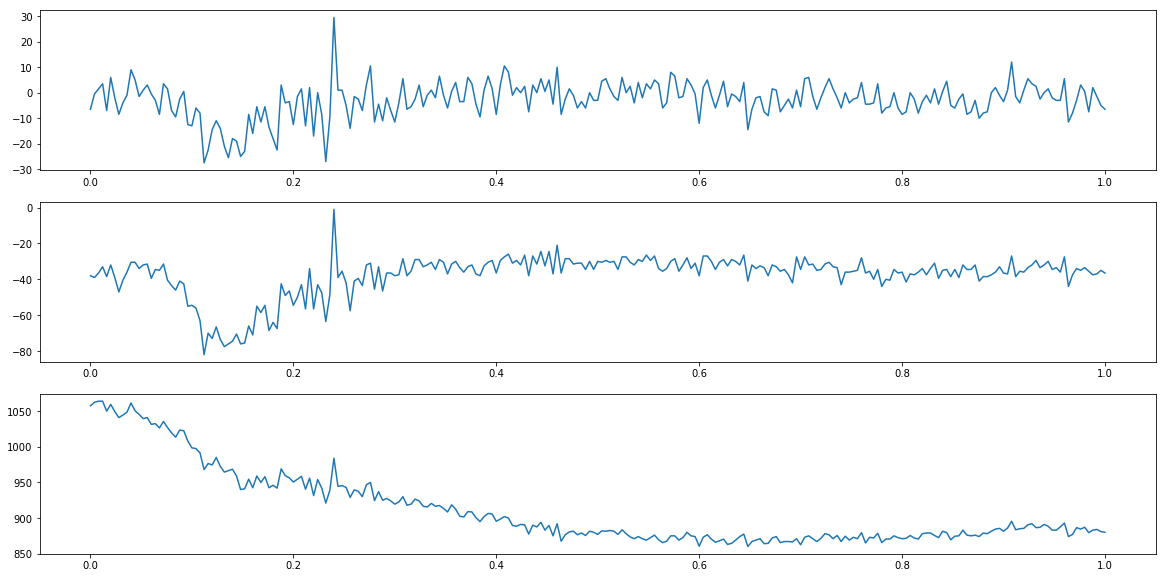

In [29]:
t = np.linspace(0, 1, x[0,0,::20].shape[0])
f, axes = plt.subplots(3,1, figsize=(20,10))
axes[0].plot(t, x[0,0,::20])
axes[1].plot(t, x[0,1,::20])
axes[2].plot(t, x[0,2,::20])

In [30]:
seed = 1
np.random.seed(seed)
x_tr, x_te, y_tr, y_te = train_test_split(x_flat, y_med, test_size=.2, random_state=seed)
# Stride 5 to reduce data
print(x_tr.shape)

(1167, 6500)


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras import optimizers

model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_tr, y_tr, epochs=100, batch_size=32, validation_split=0.2)

Train on 933 samples, validate on 234 samples
Epoch 1/100
933/933 [==============================] - 1s 1ms/step - loss: 7.8671 - acc: 0.5198 - val_loss: 7.9945 - val_acc: 0.5128
Epoch 2/100
933/933 [==============================] - 0s 507us/step - loss: 7.9005 - acc: 0.5177 - val_loss: 8.4566 - val_acc: 0.4829
Epoch 3/100
933/933 [==============================] - 0s 510us/step - loss: 7.9700 - acc: 0.5134 - val_loss: 8.3127 - val_acc: 0.4915
Epoch 4/100
933/933 [==============================] - 0s 521us/step - loss: 8.2159 - acc: 0.4973 - val_loss: 8.6538 - val_acc: 0.4701
Epoch 5/100
933/933 [==============================] - 0s 507us/step - loss: 8.1578 - acc: 0.5016 - val_loss: 8.7293 - val_acc: 0.4658
Epoch 6/100
933/933 [==============================] - 0s 516us/step - loss: 7.8026 - acc: 0.5241 - val_loss: 8.6765 - val_acc: 0.4701
Epoch 7/100
933/933 [==============================] - 0s 521us/step - loss: 7.9704 - acc: 0.5145 - val_loss: 7.2647 - val_acc: 0.5598
Epoch 8/100

Epoch 61/100
933/933 [==============================] - 1s 621us/step - loss: 8.4553 - acc: 0.4962 - val_loss: 8.1322 - val_acc: 0.5171
Epoch 62/100
933/933 [==============================] - 1s 607us/step - loss: 8.0368 - acc: 0.5252 - val_loss: 8.4543 - val_acc: 0.5000
Epoch 63/100
933/933 [==============================] - 1s 573us/step - loss: 8.1746 - acc: 0.5177 - val_loss: 8.3880 - val_acc: 0.5043
Epoch 64/100
933/933 [==============================] - 1s 539us/step - loss: 8.2438 - acc: 0.5134 - val_loss: 8.3867 - val_acc: 0.5043
Epoch 65/100
933/933 [==============================] - 1s 675us/step - loss: 8.1207 - acc: 0.5209 - val_loss: 8.3852 - val_acc: 0.5043
Epoch 66/100
933/933 [==============================] - 1s 563us/step - loss: 8.0686 - acc: 0.5241 - val_loss: 8.3838 - val_acc: 0.5043
Epoch 67/100
933/933 [==============================] - 1s 619us/step - loss: 8.0233 - acc: 0.5273 - val_loss: 8.2103 - val_acc: 0.5171
Epoch 68/100
933/933 [==========================

In [34]:
from sklearn.metrics import accuracy_score, recall_score

y_pred_tr = model.predict_classes(x_tr)
y_pred_te = model.predict_classes(x_te)
print(np.unique(y_pred_tr,return_counts=True))
print(np.unique(y_pred_te,return_counts=True))
print(y_pred_tr)
print("Train:", accuracy_score(y_tr, y_pred_tr))
print("Test:", accuracy_score(y_te, y_pred_te))
print("Train:", recall_score(y_tr, y_pred_tr))
print("Train:", recall_score(y_te, y_pred_te))

(array([0], dtype=int32), array([1167]))
(array([0], dtype=int32), array([292]))
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Train: 0.532133676092545
Test: 0.4863013698630137
Train: 0.0
Train: 0.0
